# 2D PCA  for title clusters

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# local
import set_path
import supp.support_load as lp
import supp.support_get_mapping as gm

In [3]:
folder = r'data/'
file_name = 'person_title_cluster_pivot.csv'

In [4]:
folder_save = 'img/plots_PCA_of_titles_normalization/'
# Check if 'img' directory exists, if not, create it
if not os.path.exists(folder_save.split('/')[0]):
    os.makedirs(folder_save.split('/')[0])
# Check if 'plots' directory exists within 'img', if not, create it
if not os.path.exists(folder_save[:-1]):
    os.makedirs(folder_save[:-1])

In [5]:
data0 = lp.read_csv(file_name, folder=folder, index_col='ID_person')
data0.head()

,administration,epithet,family,priest,privy,rank,worker
ID_person,,,,,,,
1,7,3,0,4,4,4,1
2,1,1,1,1,1,2,0
4,0,2,0,4,4,1,2
5,0,2,0,3,3,1,1
6,0,4,1,1,0,2,0


In [6]:
data0.describe()

,administration,epithet,family,priest,privy,rank,worker
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,0.528370,0.411888,0.316722,0.564395,0.160612,0.475233,0.121585
std,1.292397,0.857556,0.465268,0.783642,0.562884,0.692453,0.346479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,13.000000,6.000000,1.000000,8.000000,6.000000,5.000000,3.000000


In [7]:
data = (data0-data0.mean())/data0.std()
data.describe()

,administration,epithet,family,priest,privy,rank,worker
count,3.331000e+03,3.331000e+03,3.331000e+03,3.331000e+03,3.331000e+03,3.331000e+03,3331.000000
mean,-3.412994e-17,3.839619e-17,-2.559746e-17,-9.919014e-17,-5.972740e-17,8.532486e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-4.088293e-01,-4.803049e-01,-6.807300e-01,-7.202203e-01,-2.853383e-01,-6.863029e-01,-0.350917
25%,-4.088293e-01,-4.803049e-01,-6.807300e-01,-7.202203e-01,-2.853383e-01,-6.863029e-01,-0.350917
50%,-4.088293e-01,-4.803049e-01,-6.807300e-01,-7.202203e-01,-2.853383e-01,-6.863029e-01,-0.350917
75%,3.649266e-01,-4.803049e-01,1.468570e+00,5.558721e-01,-2.853383e-01,7.578379e-01,-0.350917
max,9.649996e+00,6.516323e+00,1.468570e+00,9.488519e+00,1.037405e+01,6.534401e+00,8.307626


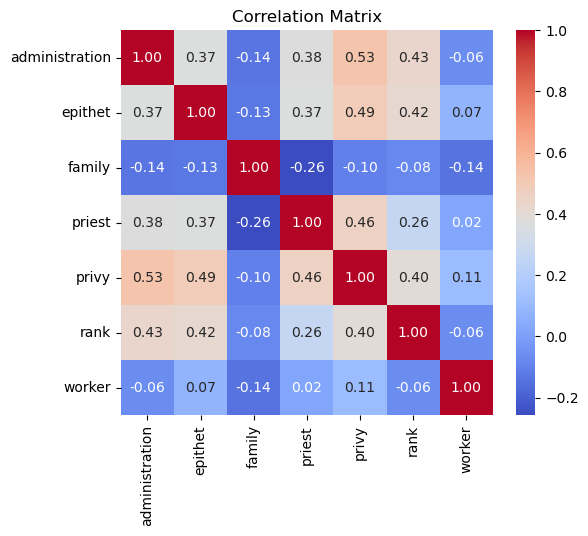

In [8]:
# Assuming your DataFrame is named df
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

PCA

In [9]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)
# Fit PCA to your data
pca.fit(data)
# Transform the data into the new 2-dimensional space
X_2d = pca.transform(data)
 # Convert the transformed data into a DataFrame
X_2d = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])

In [10]:
# Plot the 2D scatterplot
def scatter(cluster, figsize=(6, 5), size_scat = None, size_leg=8):
    # sort array
    cluster_data = np.array(data[cluster])
    idx_sorted = cluster_data.argsort()
    cluster_data = cluster_data[idx_sorted]
    X = X_2d.iloc[idx_sorted, :]
    n_max = data0[cluster].max() + 1
    # colors
    tab20c = np.array(plt.get_cmap('tab20c').colors)
    palette = tab20c
    if n_max <= 5:
        palette = palette[::4]
    elif n_max <=10:
        palette = [c for id, c in enumerate(palette) if id % 4 == 1 or id % 4 == 0]
        palette = np.array(palette)
    colors = palette[data0.iloc[idx_sorted, :][cluster].to_list()]
    # plots
    plt.figure(figsize=figsize)
    # Setting font sizes globally
    plt.rcParams.update({'font.size': 12})  # Set the font size globally
    if size_scat is not None:
        plt.scatter(X['PC1'], X['PC2'], c=colors, alpha=.99, s=size_scat)
    else:
        plt.scatter(X['PC1'], X['PC2'], c=colors, alpha=.99)
    #plt.title(f'2D PCA of title clusters\nColored by {cluster}')
    plt.title(f'Colored by {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    # Create custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=palette[i],
                          markersize=size_leg, label=str(i)) for i in range(0, n_max)]
    plt.legend(handles=handles, title="n. of titles", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(folder_save + f'PCA_title_{cluster}_normalization.png',  dpi=600)
    plt.savefig(folder_save + f'PCA_title_{cluster}_normalization.pdf')
    plt.show()

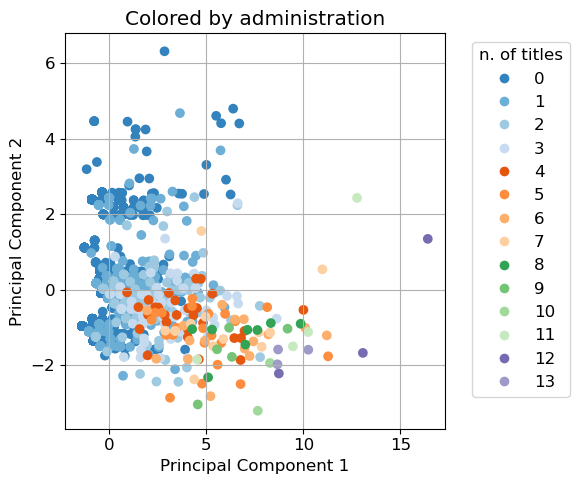

In [11]:
# Plot the 2D scatterplot
cluster = 'administration'
scatter(cluster)

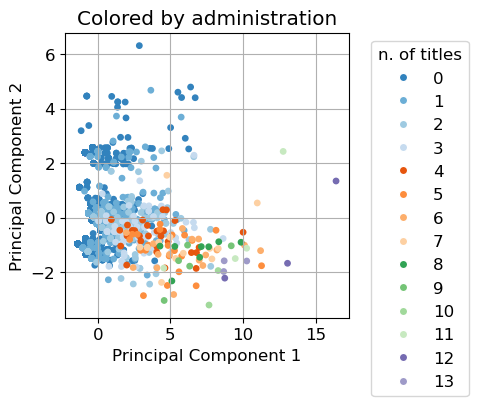

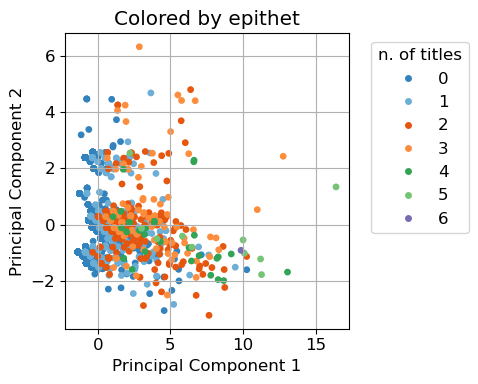

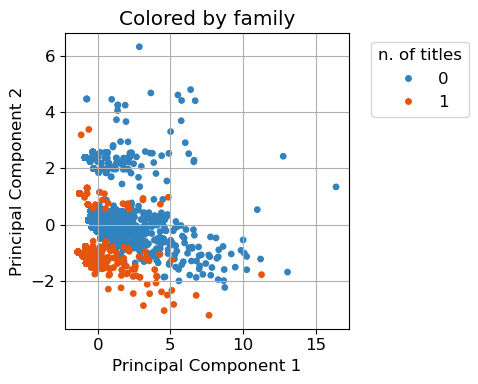

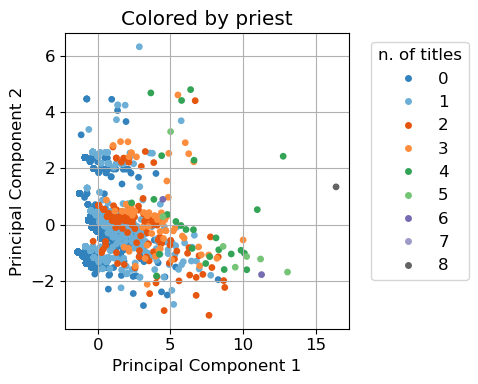

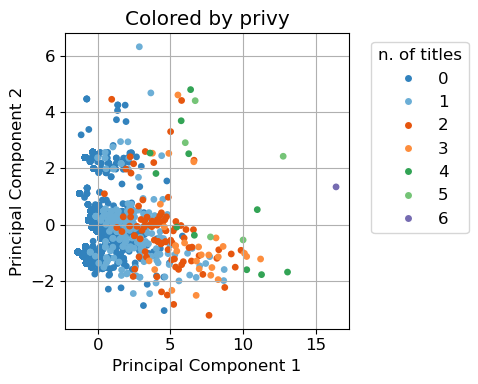

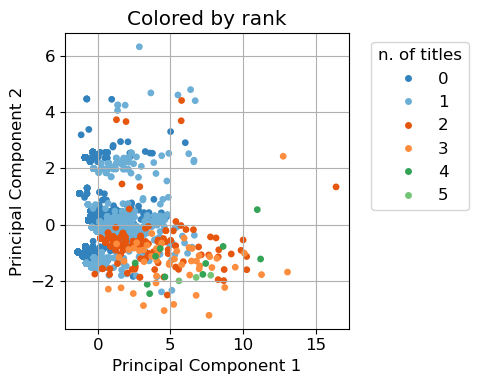

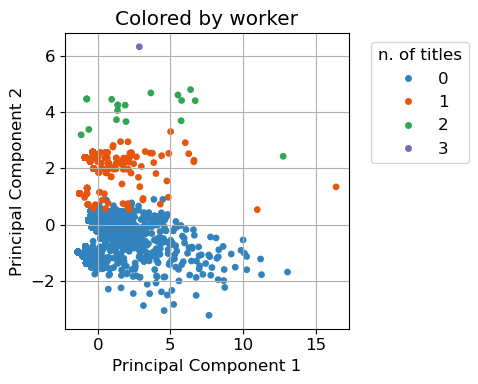

Finished.


In [12]:
for id, cluster in enumerate(data.columns):
    scatter(cluster, figsize=(5, 4), size_scat = 15, size_leg=6)

print('Finished.')

In [13]:
data.columns

Index(['administration', 'epithet', 'family', 'priest', 'privy', 'rank',
       'worker'],
      dtype='object')

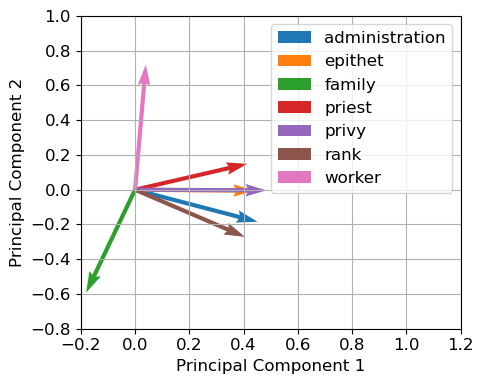

In [14]:
# Plot arrows representing original features in PCA space
plt.figure(figsize=(5, 4))
# Setting font sizes globally
#plt.rcParams.update({'font.size': 12})  # Set the font size globally

# Scaling factor for the arrows (to make them visible)
arrow_size = 1
colors = plt.cm.tab10.colors

size = {
    'administration': 1.3,
    'epithet': 1.2,
    'family': 1.1,
    'priest': 1.35,
    'privy': 1.7, 
    'rank': 1.3,
    'worker': 1.1
}

# Plot arrows and feature names
for i, v in enumerate(pca.components_.T):
    cluster = data.columns[i]
    plt.quiver(0, 0, v[0] * arrow_size, v[1] * arrow_size, angles='xy', scale_units='xy', scale=1, color=colors[i],
               alpha=1, label=cluster, width=0.011 )
    #plt.arrow(0, 0, v[0] * arrow_size, v[1] * arrow_size, color=colors[i], alpha=0.5)
    #plt.text(v[0] * arrow_size * size[cluster], v[1] * arrow_size * size[cluster], data.columns[i], color='black', ha='center', va='center')
# Set the limits for x and y axes
plt.xlim(-.8, .6)
plt.ylim(-.8, 1)
plt.xlim(-.2, 1.2)
plt.ylim(-.8, 1)
# Create custom legend
plt.legend(loc='upper right')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('Projection of Feature Vectors')
plt.grid()

plt.tight_layout()
plt.savefig(folder_save + f'PCA_title_feature_projection_normalization.png', dpi=600)
plt.savefig(folder_save + f'PCA_title_feature_projection_normalization.pdf')
plt.show()

In [18]:
pd.DataFrame(pca.components_, index=['w1', 'w2'])

,0,1,2,3,4,5,6
w1,0.451228,0.439047,-0.180361,0.413784,0.483902,0.405141,0.039795
w2,-0.184395,-0.005239,-0.592471,0.149099,-0.003518,-0.271547,0.720395
